# Plotting "Time" evolution WAXS contours

### This script is used to plot WAXS contour to visualize the data. In one figure, there're 4 subplots:
1. The WAXS contour (contour): x = q, y = scan number (time)
2. The horizontal profile cut (Hcut): x = q, y = intensity
3. The vertical profile cut (Vcut): x = intensity, y = scan number (time)
4. The potential profile of the cell (ECP): x = potential, y = time

### The script allows uses to define these parameters:
1. The frame number: x
2. The q range: min & max
3. The horizontal cuts (the cut at specified scan number): s
4. The vertical cuts (the cut at specified q): q

### The whole script is separated into two sections:
1. Plot multiple frames all together. (ex: x = 17 ~ 26)
2. Plot only one frame. (ex: x = 24)

It's adviced to use the script in the section 2 first to confirm the desirable parameters for plotting. After, use the script in the section 1 to plot the WAXS contours of assigned frames all at once.

### The script is refined and have these automatic features:
1. Maximize the contrast in the contour.
2. Autoscale the Hcut and Vcut.
3. Synchronize the colors of cut lines and the profiles in Hcut and Vcut. For now 8 colors are chosen.
4. Plot the dots which corresponds to horizontal cuts at the ECP.

##### Little comment: Well... Basically, everything is optimized and automized. Have fun!!!

## Section 1: the loop plotting all assigned frames
### Assign the parameters  and import the electrochemical data (EC)

In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

#### input the q range
min = 2.2
#float(input('Please enter the min of x axis'))
max = 2.8
#float(input('please enter the max of x axis'))
step = round((max-min)/10, 2)
max2=max+step

#### input the horizontal cut
s2 = '2,22,42,62,82,102'
#input('Enter one or multiple "sequence of the scan" that you want to make cuts. Even number only. ex: 2,4,8.   ')
s2 = s2.split(',')

#### input the vertical cut
### because of the misalignment of the cell, the peak shifts to higher q in larger frame number.
#q = pd.DataFrame()
#q['q1'] = np.arange(1.694,1.698, step= 0.0004)
#q['q2'] = np.arange(1.780,1.784, step= 0.0004)
#q['q3'] = np.arange(1.812,1.816, step= 0.0004)
#q['q4'] = np.arange(1.852,1.856, step= 0.0004)
#q['q5'] = np.arange(1.865,1.869, step= 0.0004)

#### assign the frame number
#fr = np.arange(17,27, step= 1)

### Import electrochemical data

file = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/echm/20220712_G_SnO_beamtime_02_GCPL_C01.txt'
EC2 = pd.read_csv(file,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11],
                 names= ['Time', 'E'],
                 engine='python')

EC2['Time'] = EC2['Time']/3600-EC['Time'].max()

### The loop which:
#### 1. Imports WAXS data of assigned frames. 
In the project, all files are stored in the laptop, but user can modify the path to run the script in ESRF's jupyter. 
#### 2. Plots the data.
#### 3. Saves the figures.

410
547
69170140.0 174591500.0
410
547
73762010.0 158967300.0
410
547
75870490.0 161283400.0
410
547
76711960.0 159564700.0
410
547
78012360.0 159811700.0
410
547
78191230.0 154462600.0
410
547
77355180.0 142227000.0
410
547
76046950.0 142513300.0
410
547
75690180.0 132483400.0
410
547
72649900.0 127150600.0
410
547
66990410.0 126897000.0


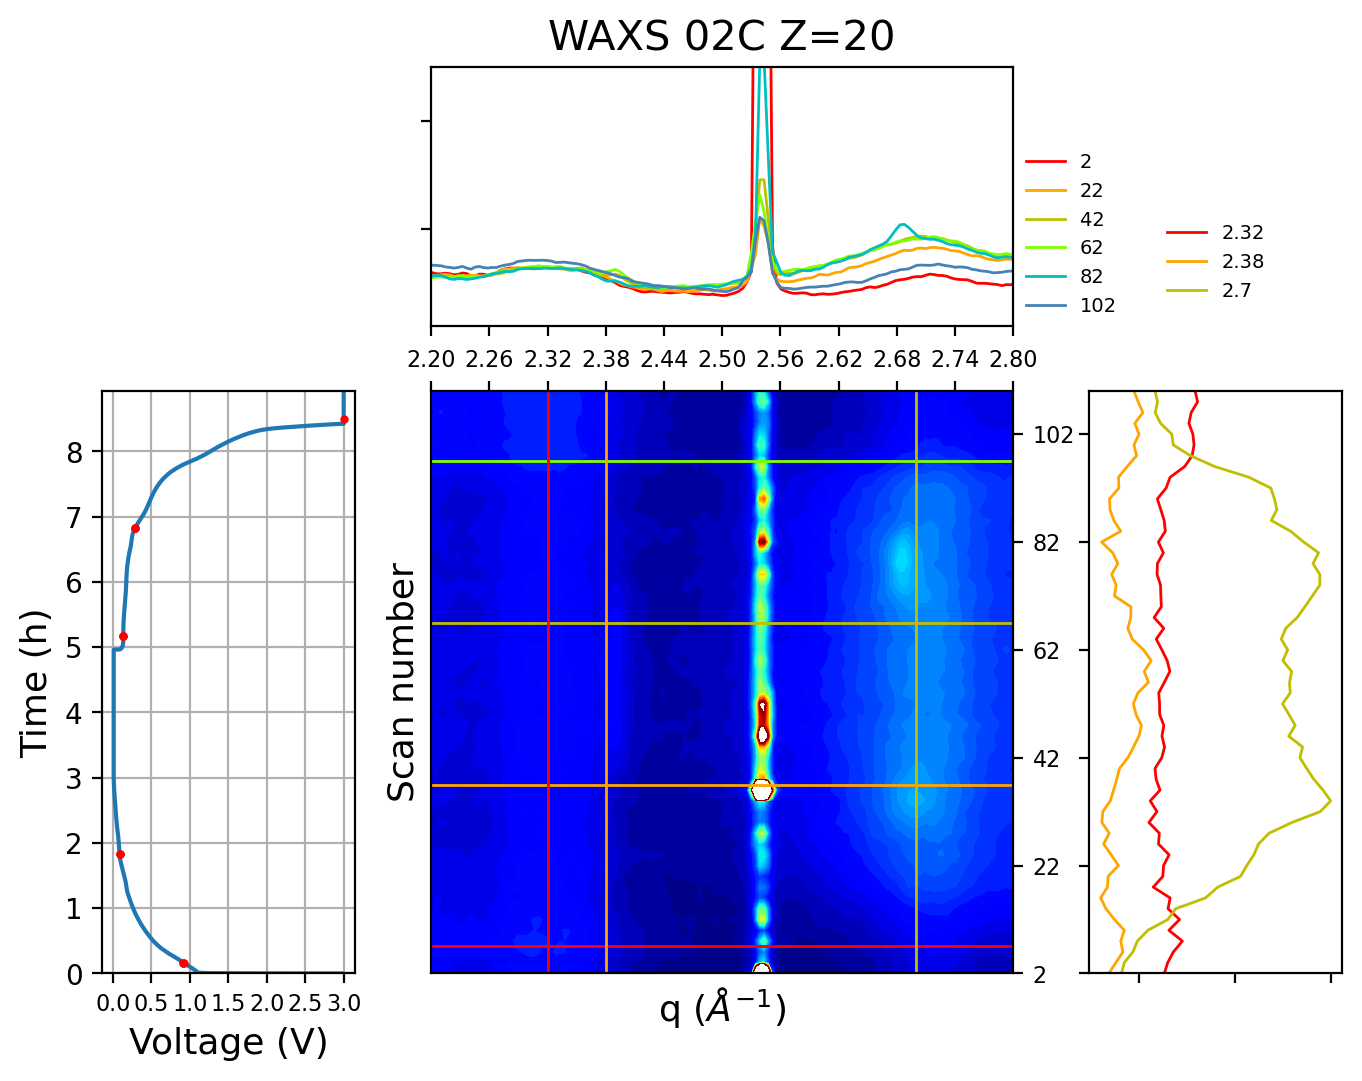

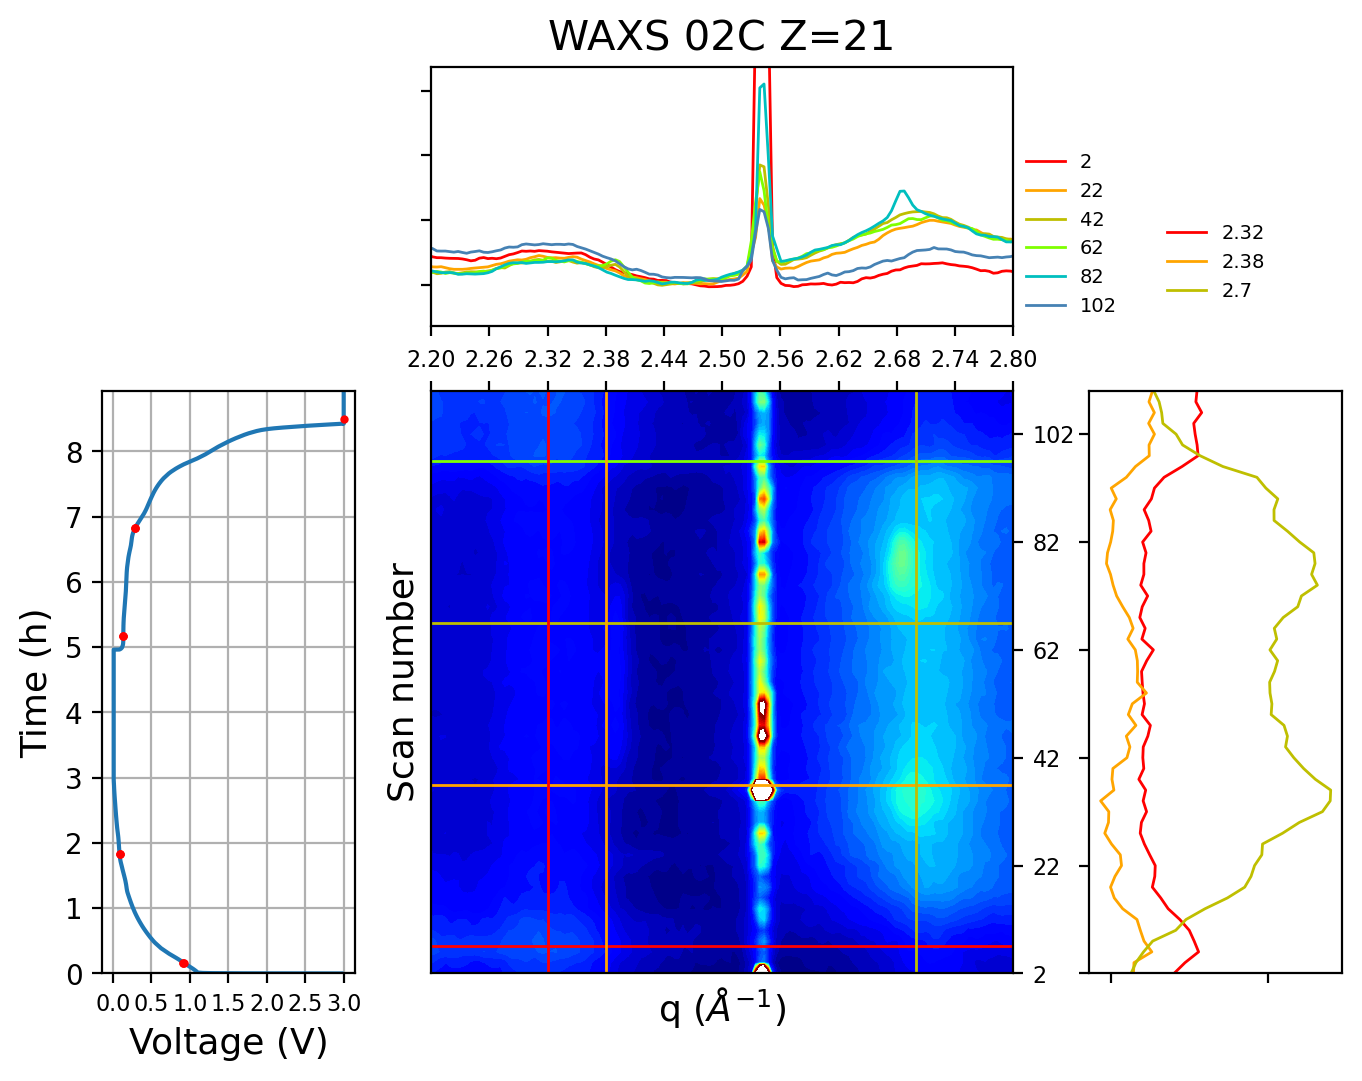

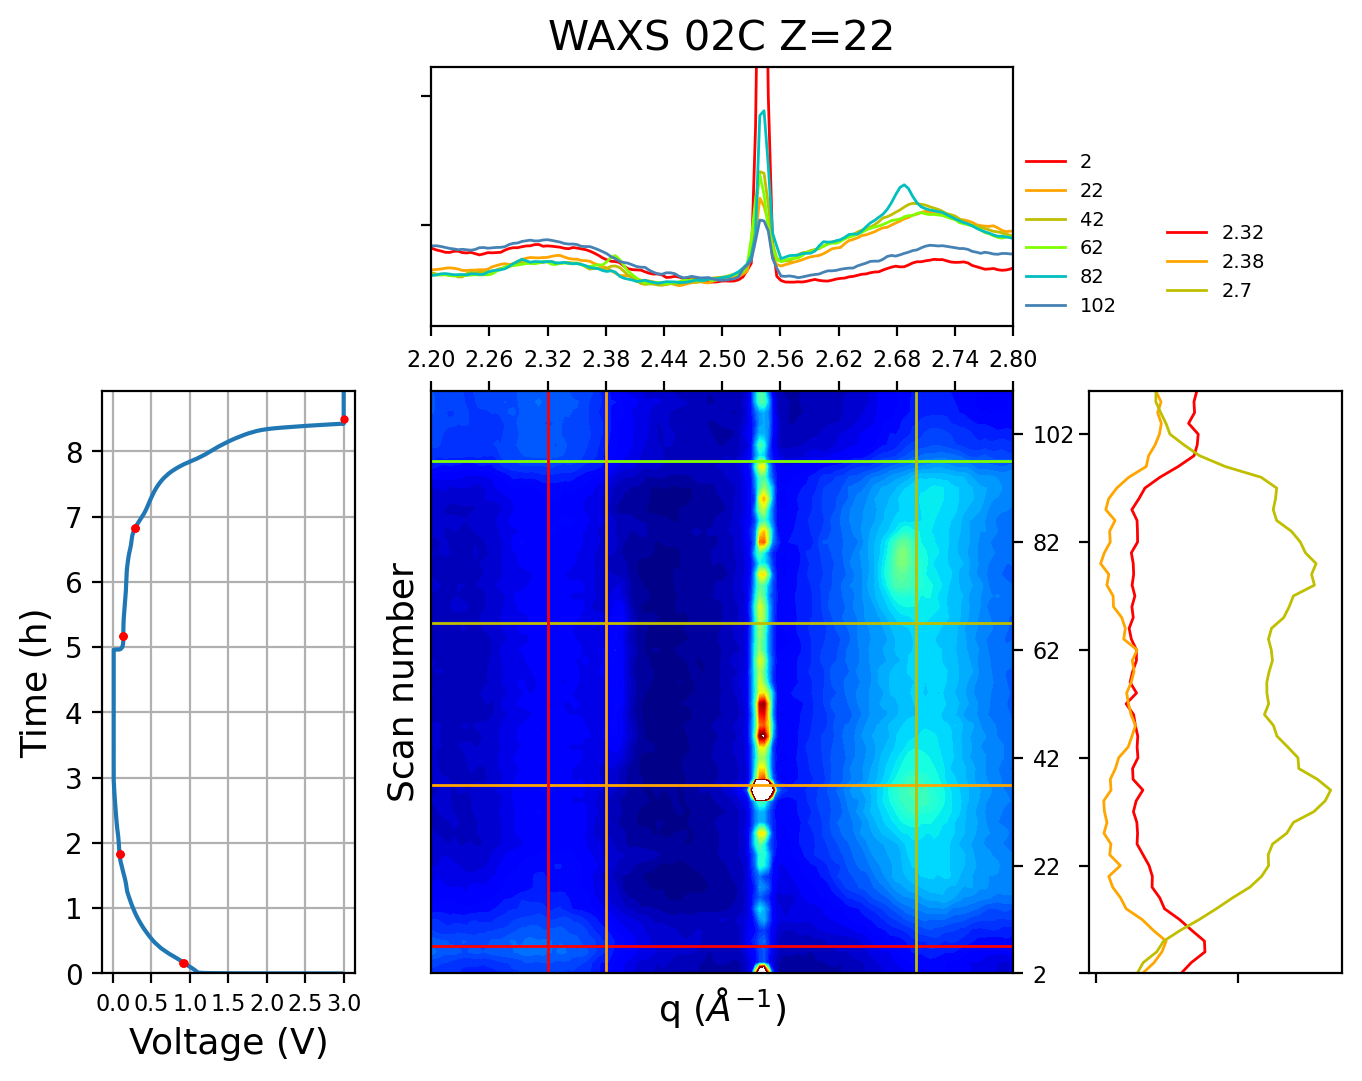

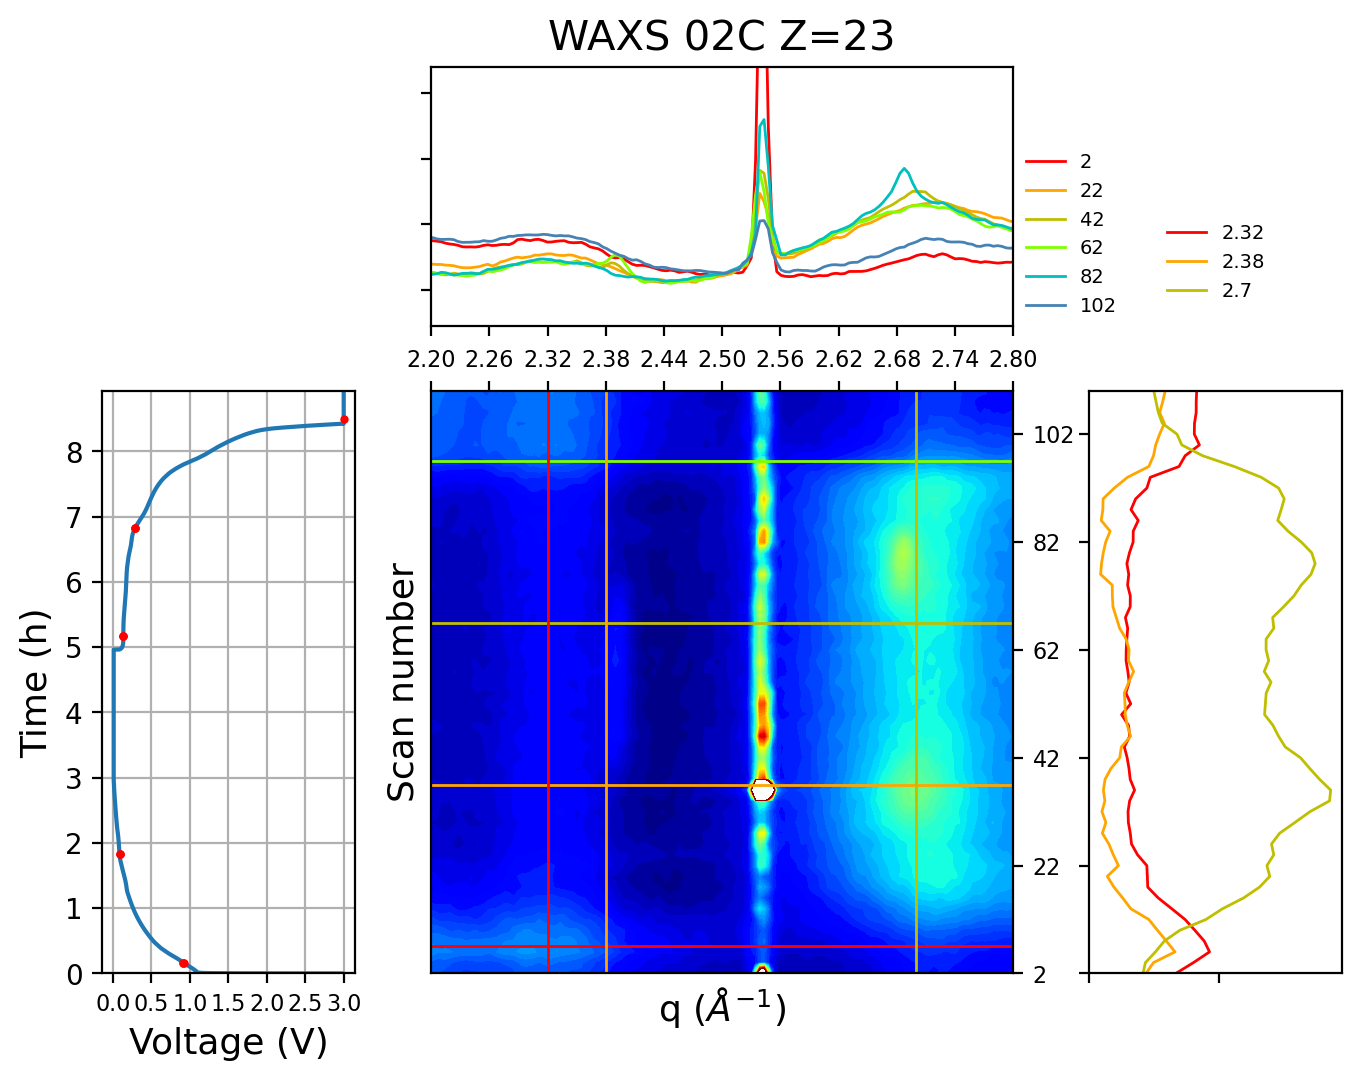

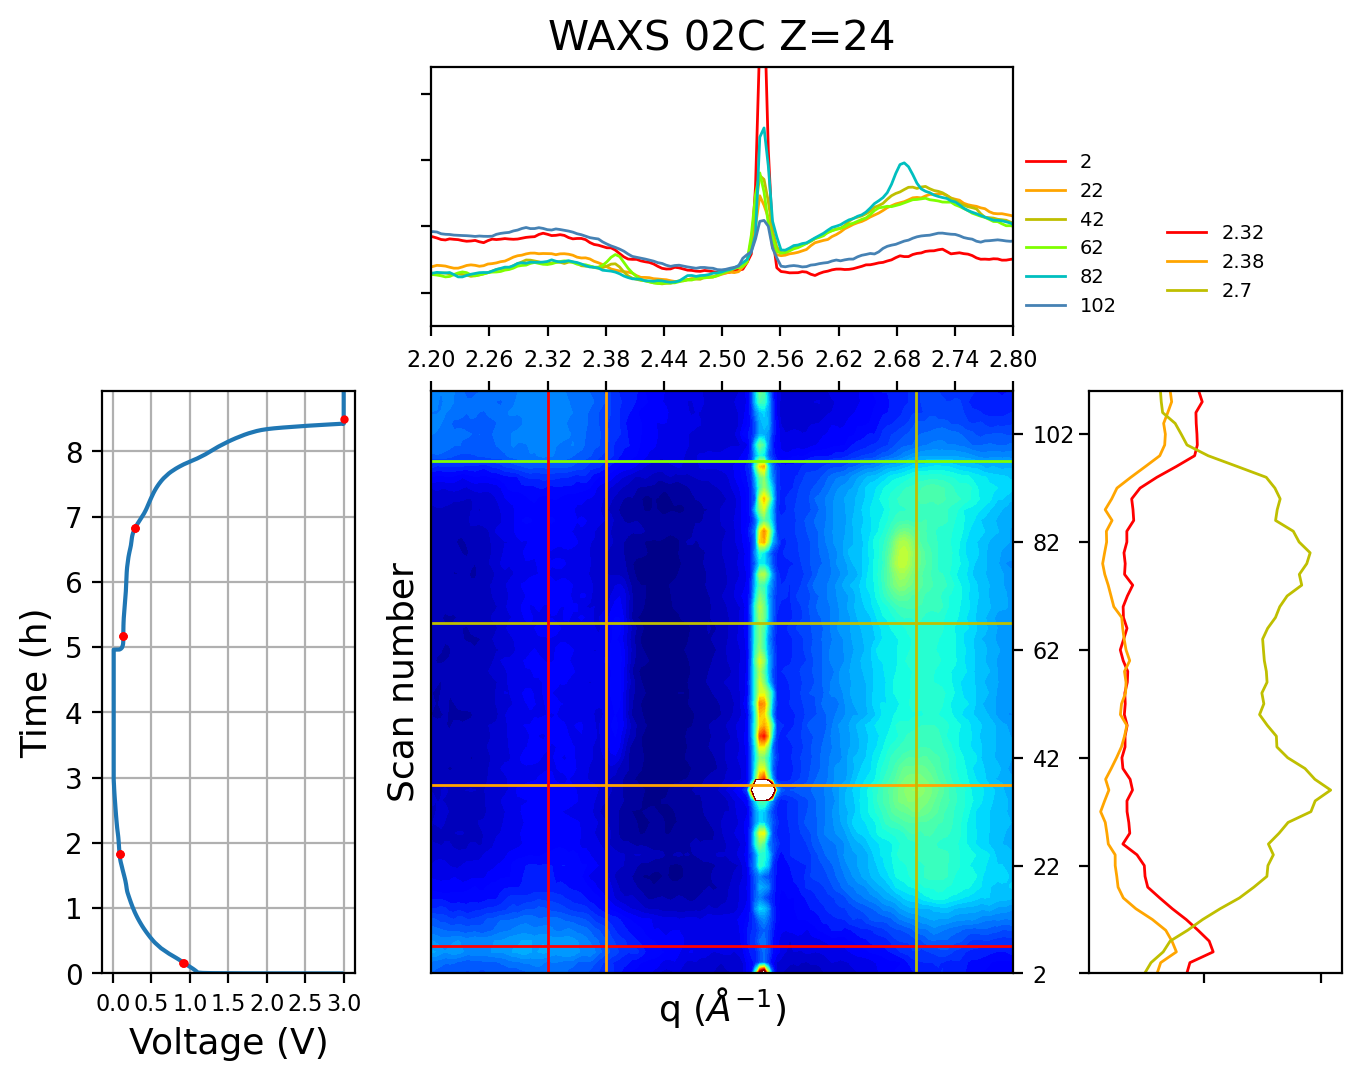

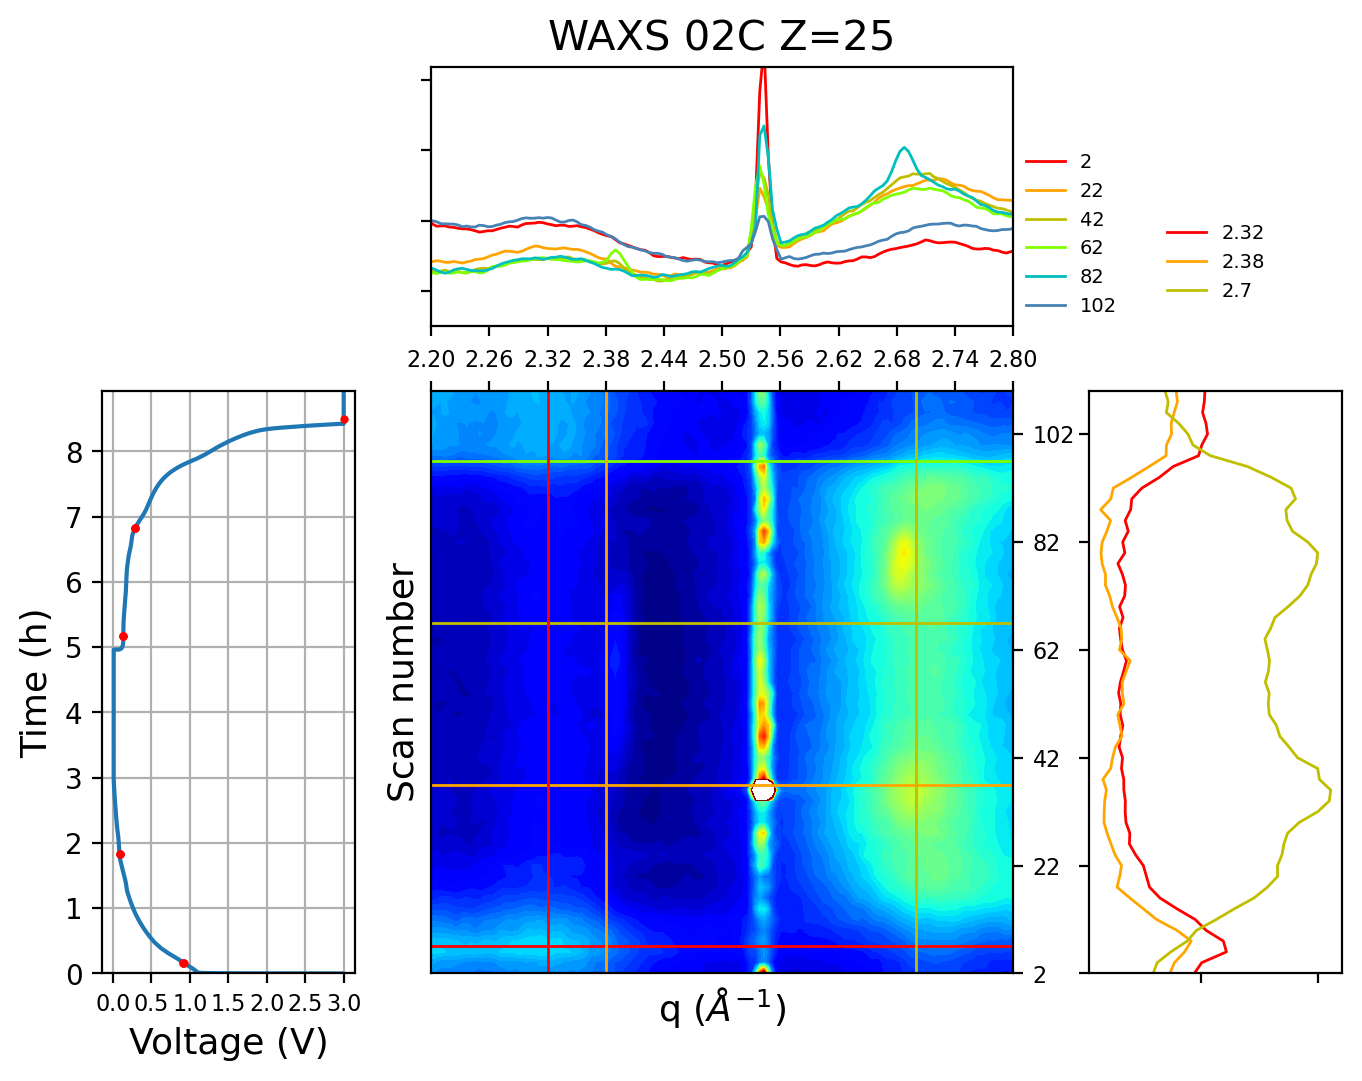

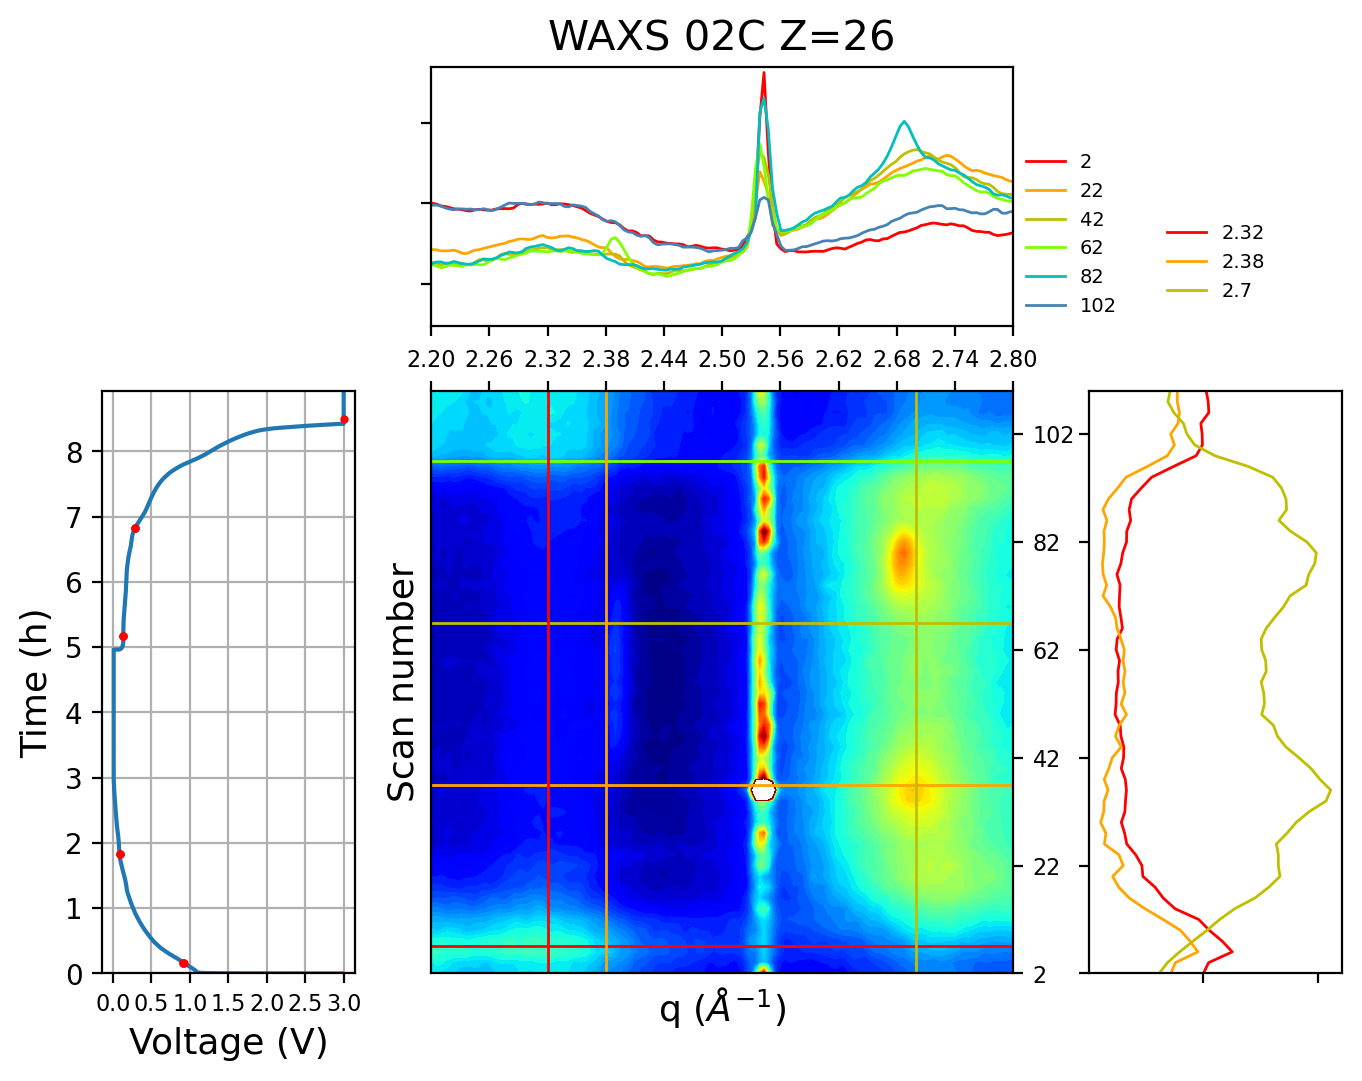

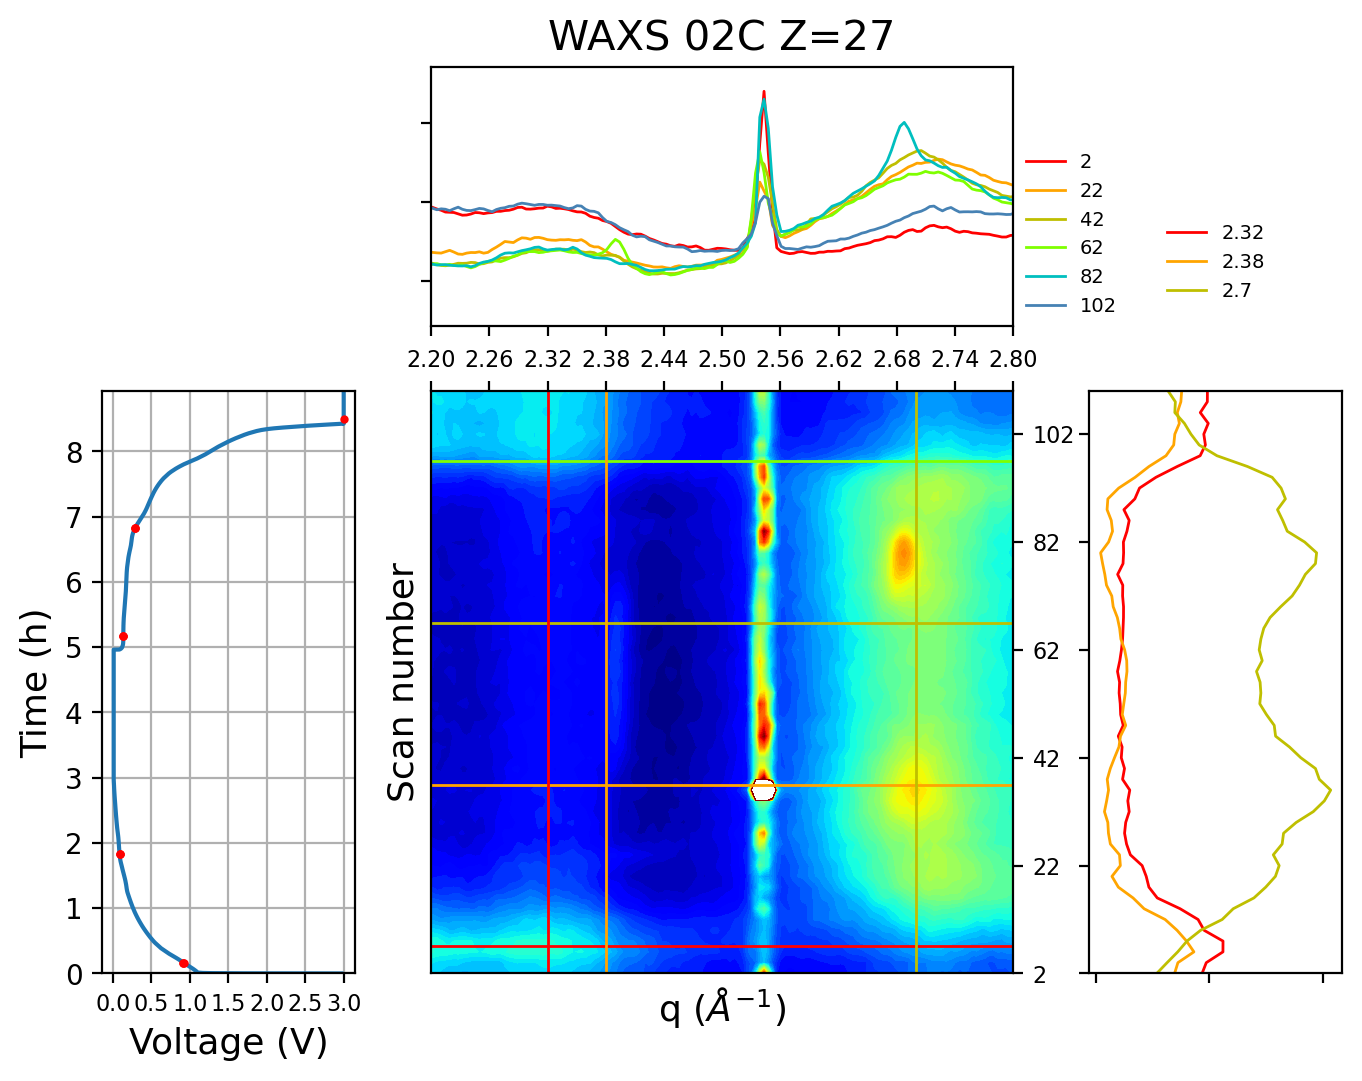

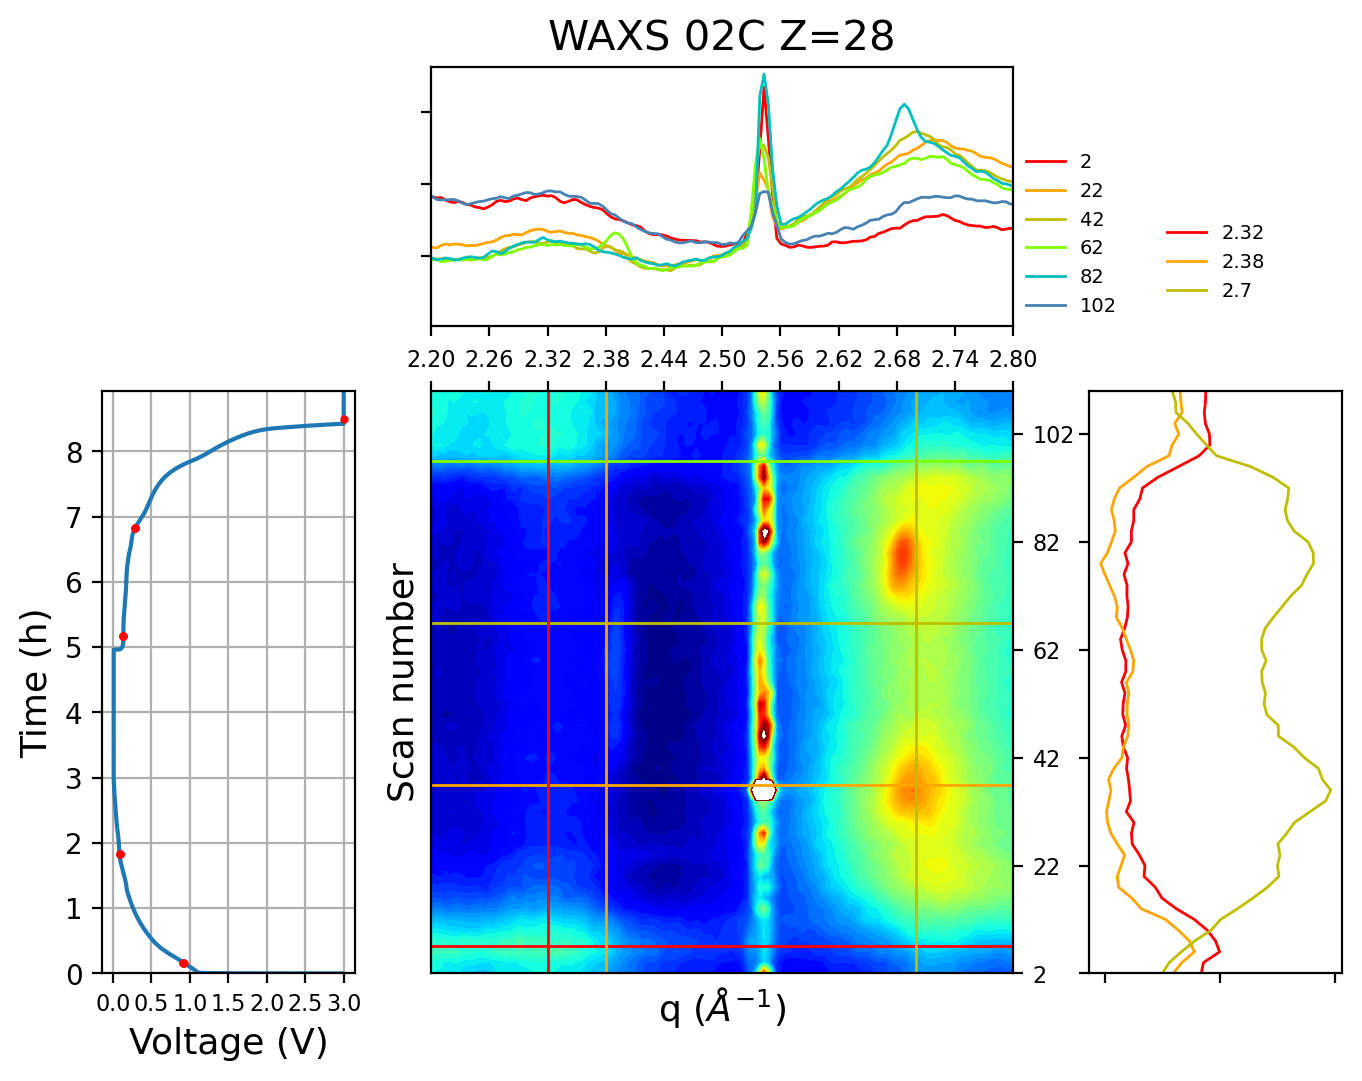

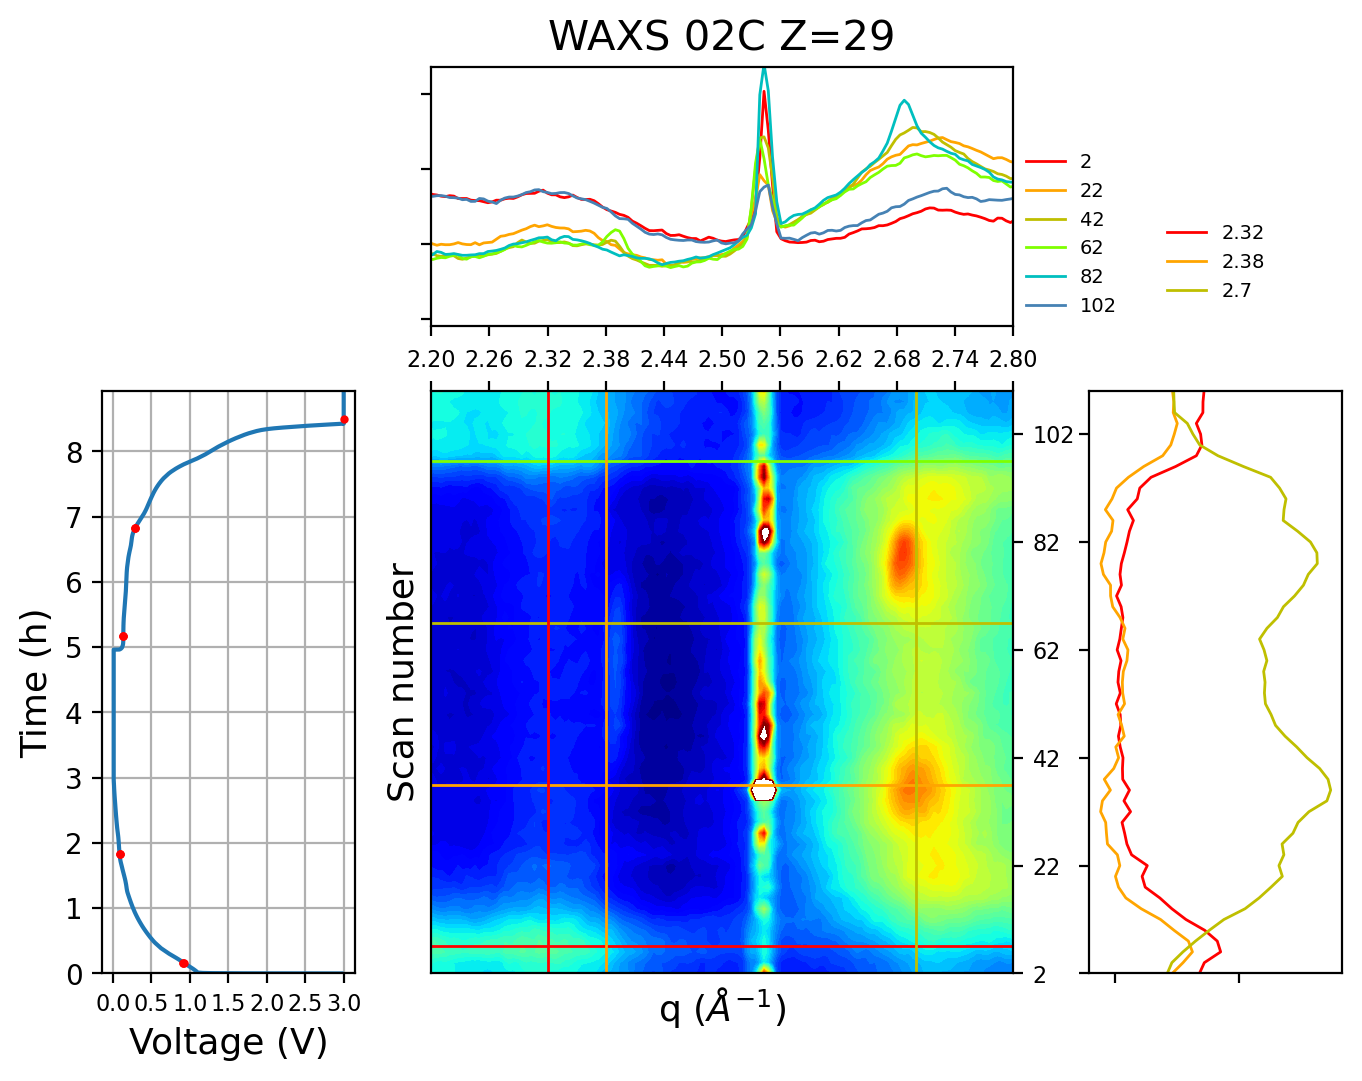

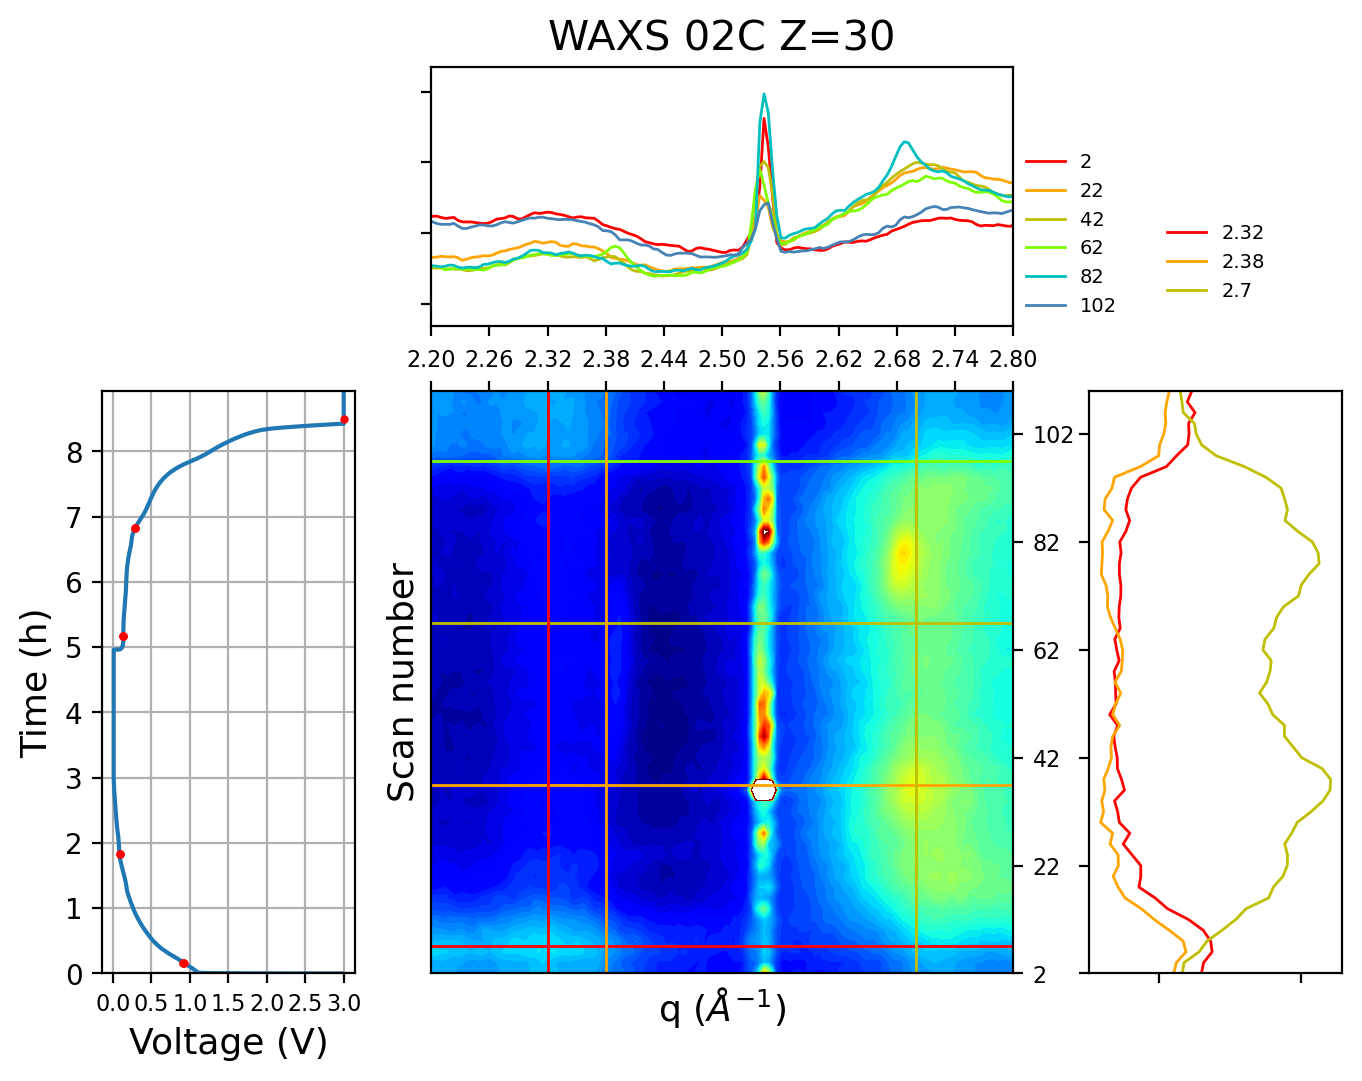

In [116]:
for x in range(20,31):
    path = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/WAXS/02_02C/'
    file_name = '02_02C_0001_'
    file_BG = '02_02C_0001_0002_0000.dat'
    frame = '_00%02d.dat' %x

    #BG = pd.read_csv(path + file_BG, delimiter='    ', skiprows=23, usecols=[0], names= ['q'], engine='python')

    dfs=[]

    #import data into one data frame
    for i in range(300):
        name = file_name+ '0%03d'%i + frame
        if name in os.listdir(path):
            dfs.append(pd.read_csv(path + name, delimiter='    ', skiprows=23, usecols=[1] , names= ['%d'%i], engine='python'))
        else:
            continue
    finaldfs2 = pd.concat(dfs, axis=1)

    ### create arrays for x and y columns
    x_col = np.array(BG['q'])
    #y_col = np.array(list(finaldfs.columns))
    y_col = np.array(list(range(len(finaldfs2.columns))))

    ### make a grid which x axis is "2 theta", y axis is "scan #"
    X, Y = np.meshgrid(y_col, x_col)

    from matplotlib import cm

    ### built the grid for multiple figures
    fig = plt.figure(figsize=(8, 6), dpi=200)
    grid = plt.GridSpec(3, 4, hspace=0.25, wspace=0.3)
    contour = fig.add_subplot(grid[1:, 1:-1])
    Vcut = fig.add_subplot(grid[1:, -1], xticklabels=[], sharey=contour)
    Hcut = fig.add_subplot(grid[0, 1:-1], yticklabels=[], sharex=contour)
    ECP = fig.add_subplot(grid[1:, 0])

    ### Optimize the levels for contour

    for row in range(0,len(BG['q'])):  # Find the row number
        if abs(BG.loc[row,'q']-min)<0.002: # If the row value is close enough
            LB = row #Lower boundary
            print(LB)
        else:
            continue
    for row in range(0,len(BG['q'])):  # Find the row number
        if abs(BG.loc[row,'q']-max)<0.002: # If the row value is close enough
            UB = row #Upper boundary
            print(UB)
        else:
            continue

    Imax = finaldfs2[int(LB):int(UB)].max().max()*0.1 # the maximum intensity in this range
    Imin = finaldfs2[int(LB):int(UB)].min().min() # the minimum intensity in this range

    print(Imin,Imax)

    n=50
    levels=np.linspace(Imin, Imax, n)
    #levels=np.linspace(7e7, 6e8, n)


    ### Plot the electrochemical data
    ECP.plot(EC2['E'],EC2['Time'])
    ECP.set_ylabel('Time (h)',fontdict={'fontsize':13})
    ECP.set_xlabel('Voltage (V)',fontdict={'fontsize':13})
    ECP.set_ylim(0, EC2['Time'].max())
    ECP.set_xticks(np.arange(0, 3.5 , step = 0.5))
    ECP.tick_params(axis='x',
                    which='both',
                    bottom=True,    # ticks along the bottom edge are off
                    top=False,    # ticks along the top edge are off
                    labelbottom=True,
                    labeltop=False,
                    labelsize=8.0)
    ECP.grid()


    colorlist=['red', 'orange', 'y',  'Chartreuse', 'c', '#4682B4', 'b', 'm']

    contour.set_prop_cycle(color=colorlist)
    Hcut.set_prop_cycle(color=colorlist)

    ### Plot H cut profiles to the top figure and add the H cutting lines to the contour figure

    Hcut.set_title('WAXS 02C Z=%02d' %x, fontdict={'fontsize':15})

    for w in s2:
        Hcut.plot(BG['q'], finaldfs2[w], lw=1)

     # plot the dots in ECP
        for row in range(0,len(EC2['Time'])):
            if abs(EC2.loc[row,'Time']-int(w)/12)<0.001:
                ECP.plot([EC2.loc[row,'E']],[EC2.loc[row,'Time']], 'ro', markersize=2)
            else:
                continue

    for i in range(len(s)):
        contour.plot([min, max], [int(s[i])/2, int(s[i])/2], lw=1) # plot the cut line

    #Hcut.legend(s, frameon=False, fontsize=7)
    Hcut.legend(s2, frameon=False, fontsize=7, bbox_to_anchor=(1.1, 0.7), loc='upper center', borderaxespad=0)

    Hcut.tick_params(axis='x', which='both', bottom=True, labelbottom=False)
    Hcut.tick_params(axis='y', which='both', left=True, labelleft=True)
    #Hcut.set_autoscaley_on
    Hcut.set_ylim(Imin*0.8, Imax)


    ### To plot Vcut, must know which row to plot. The following loop is used to select the correct row.
    ### Plot V cut profiles to the right figure and add the V cutting lines to the contour figure

    contour.set_prop_cycle(color=colorlist)
    Vcut.set_prop_cycle(color=colorlist)

    scan = len(finaldfs2.columns)

    for w in q:
        w = float(w)
        for row in range(0,len(BG['q'])):
            if abs(BG.loc[row,'q']-w)<0.002:
                Vcut.plot(finaldfs2.loc[row],finaldfs2.columns, lw=1)
                contour.plot([w, w], [0, scan],lw=1)  # plot the cut line
            else:
                continue

    Vcut.set_yticks(np.arange(0,scan,10))
    Vcut.set_ylim(0, scan-1)
    Vcut.set_autoscalex_on
    #Vcut.set_xlim(Imin, Imax)
    Vcut.legend(q, frameon=False, fontsize=7, bbox_to_anchor=(0.5, 1.3), loc='upper center', borderaxespad=0)

    Vcut.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=True,
                    right=False,
                    labelleft=False)    # labels along the bottom edge are off



    ### Plot contour
    contour.set_xticks(np.arange(min, max2 , step = step))
    contour.set_xlim(min, max)
    contour.contourf(Y, X, finaldfs2, levels, cmap=cm.jet )
    contour.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':13})
    contour.set_ylabel('Scan number',fontdict={'fontsize':13})
    contour.tick_params(axis='y',
                        which='both',      # both major and minor ticks are affected                         
                        left=False,
                        right=True,
                        labelright=True,
                        labelleft=False,
                        labelsize=8.0)    # labels along the bottom edge are off

    contour.tick_params(axis='x',
                        which='both',
                        bottom=False,    # ticks along the bottom edge are off
                        top=True,    # ticks along the top edge are off
                        labelbottom=False,
                        labeltop=True,
                        labelsize=8.0)

    plt.savefig('BT2_02C Z=%d '%x+'q=%.2f'%min+'~%.2f.png'%max, bbox_inches='tight')

## Section 2: plot only one single frame
### Import WAXS data & Electrochenical data

In [1]:
### Import WAXS data

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

### The frame number
x=26

path = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/WAXS/01_01C/'
file_name = '01_01C_0001_'
file_BG = '01_01C_0001_0005_0000.dat'
frame = '_00%02d.dat' %x

BG = pd.read_csv(path + file_BG, delimiter='    ', skiprows=23, usecols=[0], names= ['q'], engine='python')

dfs=[]

#import data into one data frame
for i in range(300):
    name = file_name+ '0%03d'%i + frame
    if name in os.listdir(path):
        dfs.append(pd.read_csv(path + name, delimiter='    ', skiprows=23, usecols=[1] , names= ['%d'%i], engine='python'))
    else:
        continue
finaldfs = pd.concat(dfs, axis=1)



In [2]:
### Import electrochemical data
file = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/echm/20220712_G_SnO_beamtime_01_GCPL_C01.txt'
EC = pd.read_csv(file,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11],
                 names= ['Time', 'E'],
                 engine='python')

EC['Time'] = EC['Time']/3600

### The script allow uses to define these parameters:
1. The frame number: x
2. The q range: min & max
3. The horizontal cuts (the cut at specified scan number): s
4. The vertical cuts (the cut at specified q): q

In [6]:
min = float(input('Please enter the min of x axis'))
max = float(input('please enter the max of x axis'))
step = round((max-min)/10, 2)
max2=max+step

Please enter the min of x axis 3
please enter the max of x axis 4


In [7]:
# input the horizontal cut
s = '5,35,65,95,125,155,185,215'
#'16,38,48,70,104,116,124,140'
#input('Enter one or multiple "sequence of the scan" that you want to make cuts. Even number only. ex: 2,4,8.   ')
s = s.split(',')

In [8]:
# input the vertical cut
q = '4.76'
#'4.22,4.76' #SnO, LiSnx
#'3.28,3.58' # Li8SnO6, SnO2

#'2.03,2.32,2.38,2.39,2.685,2.724' # SnO, SnO2, SnO2, LiSnx, alpha-Sn, Li2SnO3
#'1.218' # Li2SnO3
#'2.03,2.32,2.38,2.7'#,3.58,4.22,4.76,5.171' #SnO2
#'1.699,1.788,1.822,1.872' #the graphite



#'2.536,3.008,3.46' #SnO2
#'1.693,1.782,1.814,1.854,1.867'
#'5.31,5.365,5.40,5.425' #another set of graphite, but see more
#'2.007,2.338,2.535,2.699'
#'1.693,1.782,1.814,1.854,1.867'
#'1.694,1.782,1.804,1.81,1.816,1.85,1.855,1.860,1.867'
#input('Enter one or multiple q that you want to make cuts. ex: 1.86,3.23.   ')
q=q.split(',')

### Plot and save

592
821
64774080.0 772808400.0


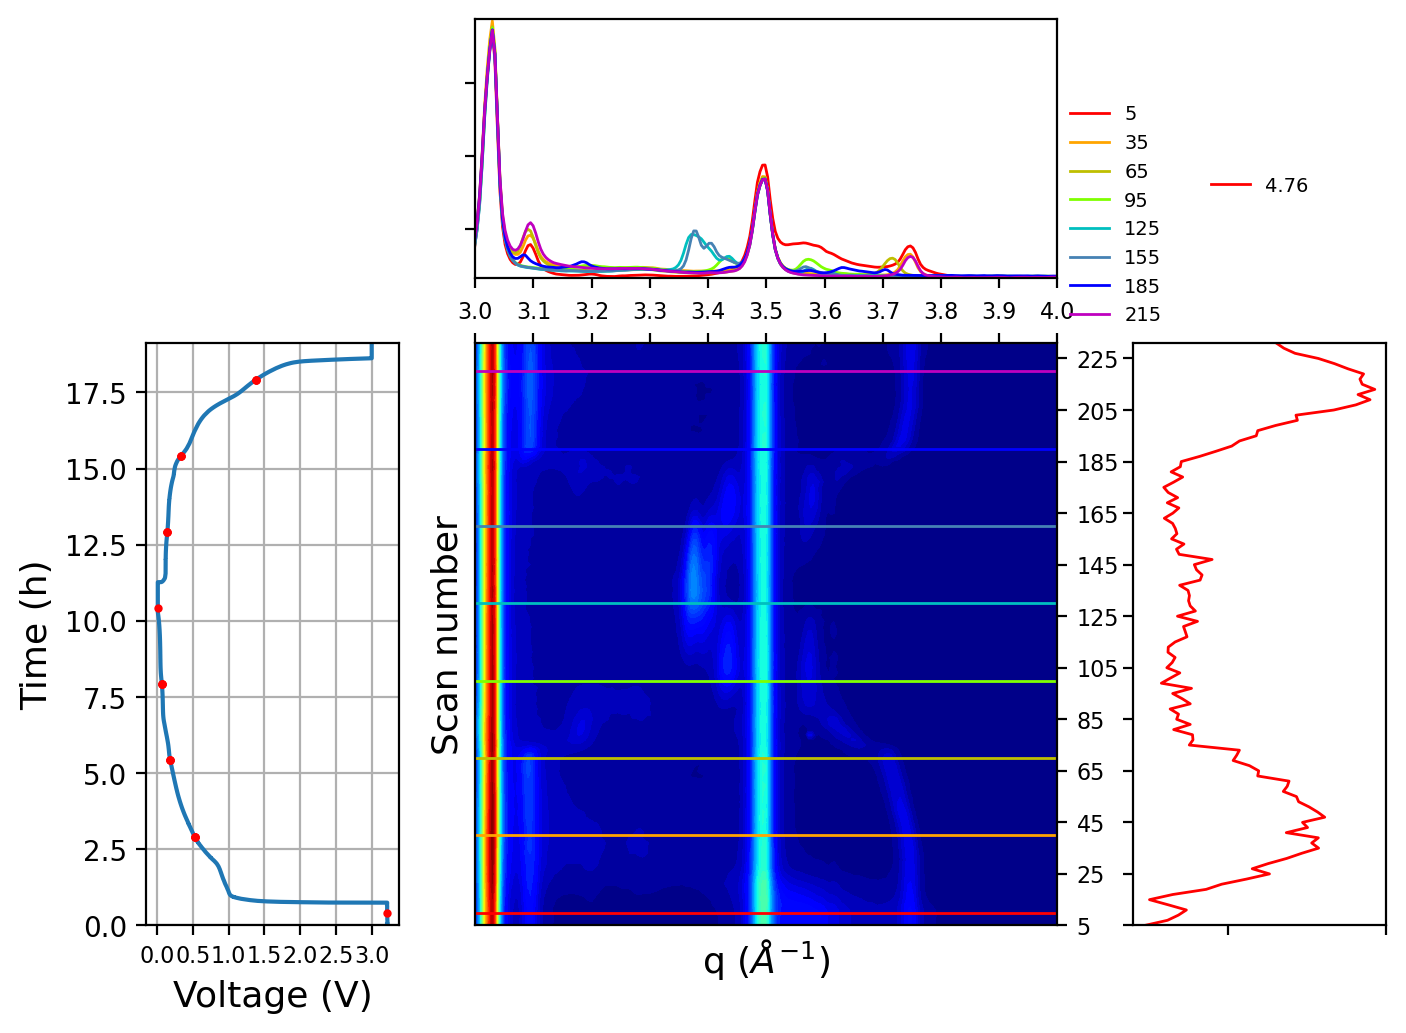

In [9]:
### create arrays for x and y columns
x_col = np.array(BG['q'])
#y_col = np.array(list(finaldfs.columns))
y_col = np.array(list(range(len(finaldfs.columns))))

### make a grid which x axis is "2 theta", y axis is "scan #"
X, Y = np.meshgrid(y_col, x_col)

from matplotlib import cm

### built the grid for multiple figures
fig = plt.figure(figsize=(8, 6), dpi=200)
grid = plt.GridSpec(3, 4, hspace=0.25, wspace=0.3)
contour = fig.add_subplot(grid[1:, 1:-1])
Vcut = fig.add_subplot(grid[1:, -1], xticklabels=[], sharey=contour)
Hcut = fig.add_subplot(grid[0, 1:-1], yticklabels=[], sharex=contour)
ECP = fig.add_subplot(grid[1:, 0])

### Optimize the levels for contour

for row in range(0,len(BG['q'])):  # Find the row number
    if abs(BG.loc[row,'q']-min)<0.002: # If the row value is close enough
        LB = row #Lower boundary
        print(LB)
    else:
        continue
for row in range(0,len(BG['q'])):  # Find the row number
    if abs(BG.loc[row,'q']-max)<0.002: # If the row value is close enough
        UB = row #Upper boundary
        print(UB)
    else:
        continue

Imax = finaldfs[int(LB):int(UB)].max().max() # the maximum intensity in this range
Imin = finaldfs[int(LB):int(UB)].min().min() # the minimum intensity in this range

print(Imin,Imax)

n=50
levels=np.linspace(Imin, Imax, n)
#levels=np.linspace(7e7, 6e8, n)


### Plot the electrochemical data
ECP.plot(EC['E'],EC['Time'])
ECP.set_ylabel('Time (h)',fontdict={'fontsize':13})
ECP.set_xlabel('Voltage (V)',fontdict={'fontsize':13})
ECP.set_ylim(0, EC['Time'].max())
ECP.set_xticks(np.arange(0, 3.5 , step = 0.5))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=8.0)
ECP.grid()


colorlist=['red', 'orange', 'y',  'Chartreuse', 'c', '#4682B4', 'b', 'm']

contour.set_prop_cycle(color=colorlist)
Hcut.set_prop_cycle(color=colorlist)

### Plot H cut profiles to the top figure and add the H cutting lines to the contour figure

#Hcut.set_title('WAXS time evolution Z=%02d' %x, fontdict={'fontsize':15})

for w in s:
    Hcut.plot(BG['q'], finaldfs[w], lw=1)
   
 # plot the dots in ECP
    for row in range(0,len(EC['Time'])):
        if abs(EC.loc[row,'Time']-int(w)/12)<0.001:
            ECP.plot([EC.loc[row,'E']],[EC.loc[row,'Time']], 'ro', markersize=2)
        else:
            continue
            
for i in range(len(s)):
    contour.plot([min, max], [int(s[i])/2, int(s[i])/2], lw=1) # plot the cut line
    
#Hcut.legend(s, frameon=False, fontsize=7)
Hcut.legend(s, frameon=False, fontsize=7, bbox_to_anchor=(1.1, 0.7), loc='upper center', borderaxespad=0)
    
Hcut.tick_params(axis='x', which='both', bottom=True, labelbottom=False)
Hcut.tick_params(axis='y', which='both', left=True, labelleft=True)
#Hcut.set_autoscaley_on
Hcut.set_ylim(Imin, Imax)


### To plot Vcut, must know which row to plot. The following loop is used to select the correct row.
### Plot V cut profiles to the right figure and add the V cutting lines to the contour figure

contour.set_prop_cycle(color=colorlist)
Vcut.set_prop_cycle(color=colorlist)

scan = len(finaldfs.columns)

for w in q:
    w = float(w)
    for row in range(len(BG['q'])):
        if abs(BG.loc[row,'q']-w)<0.002:
            Vcut.plot(finaldfs.loc[row],finaldfs.columns, lw=1)
            contour.plot([w, w], [0, scan],lw=1)  # plot the cut line
        else:
            continue
        
Vcut.set_yticks(np.arange(0,scan,10))
Vcut.set_ylim(0, scan-1)
Vcut.set_autoscalex_on
#Vcut.set_xlim(Imin, Imax)
Vcut.legend(q, frameon=False, fontsize=7, bbox_to_anchor=(0.5, 1.3), loc='upper center', borderaxespad=0)

Vcut.tick_params(axis='y',
                which='both',      # both major and minor ticks are affected                         
                left=True,
                right=False,
                labelleft=False)    # labels along the bottom edge are off



### Plot contour
contour.set_xticks(np.arange(min, max2 , step = step))
contour.set_xlim(min, max)
contour.contourf(Y, X, finaldfs, levels, cmap=cm.jet )
contour.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':13})
contour.set_ylabel('Scan number',fontdict={'fontsize':13})
contour.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=False,
                    right=True,
                    labelright=True,
                    labelleft=False,
                    labelsize=8.0)    # labels along the bottom edge are off

contour.tick_params(axis='x',
                    which='both',
                    bottom=False,    # ticks along the bottom edge are off
                    top=True,    # ticks along the top edge are off
                    labelbottom=False,
                    labeltop=True,
                    labelsize=8.0)

#plt.savefig('BT2_01C Z=%d '%x+'q=%.2f'%min+'~%.2f.png'%max, bbox_inches='tight')

# Phase profiles across the time
There are 6 subplot in the figure, the leftmost one is potnetial profile. The other 5 are phase profiles.

One can add more profiles to the figure by changing:
1. figsize
2. P6 = fig.add_subplot(grid[0,-1],  sharey = P1)
3. Adding one more q value to q_phase

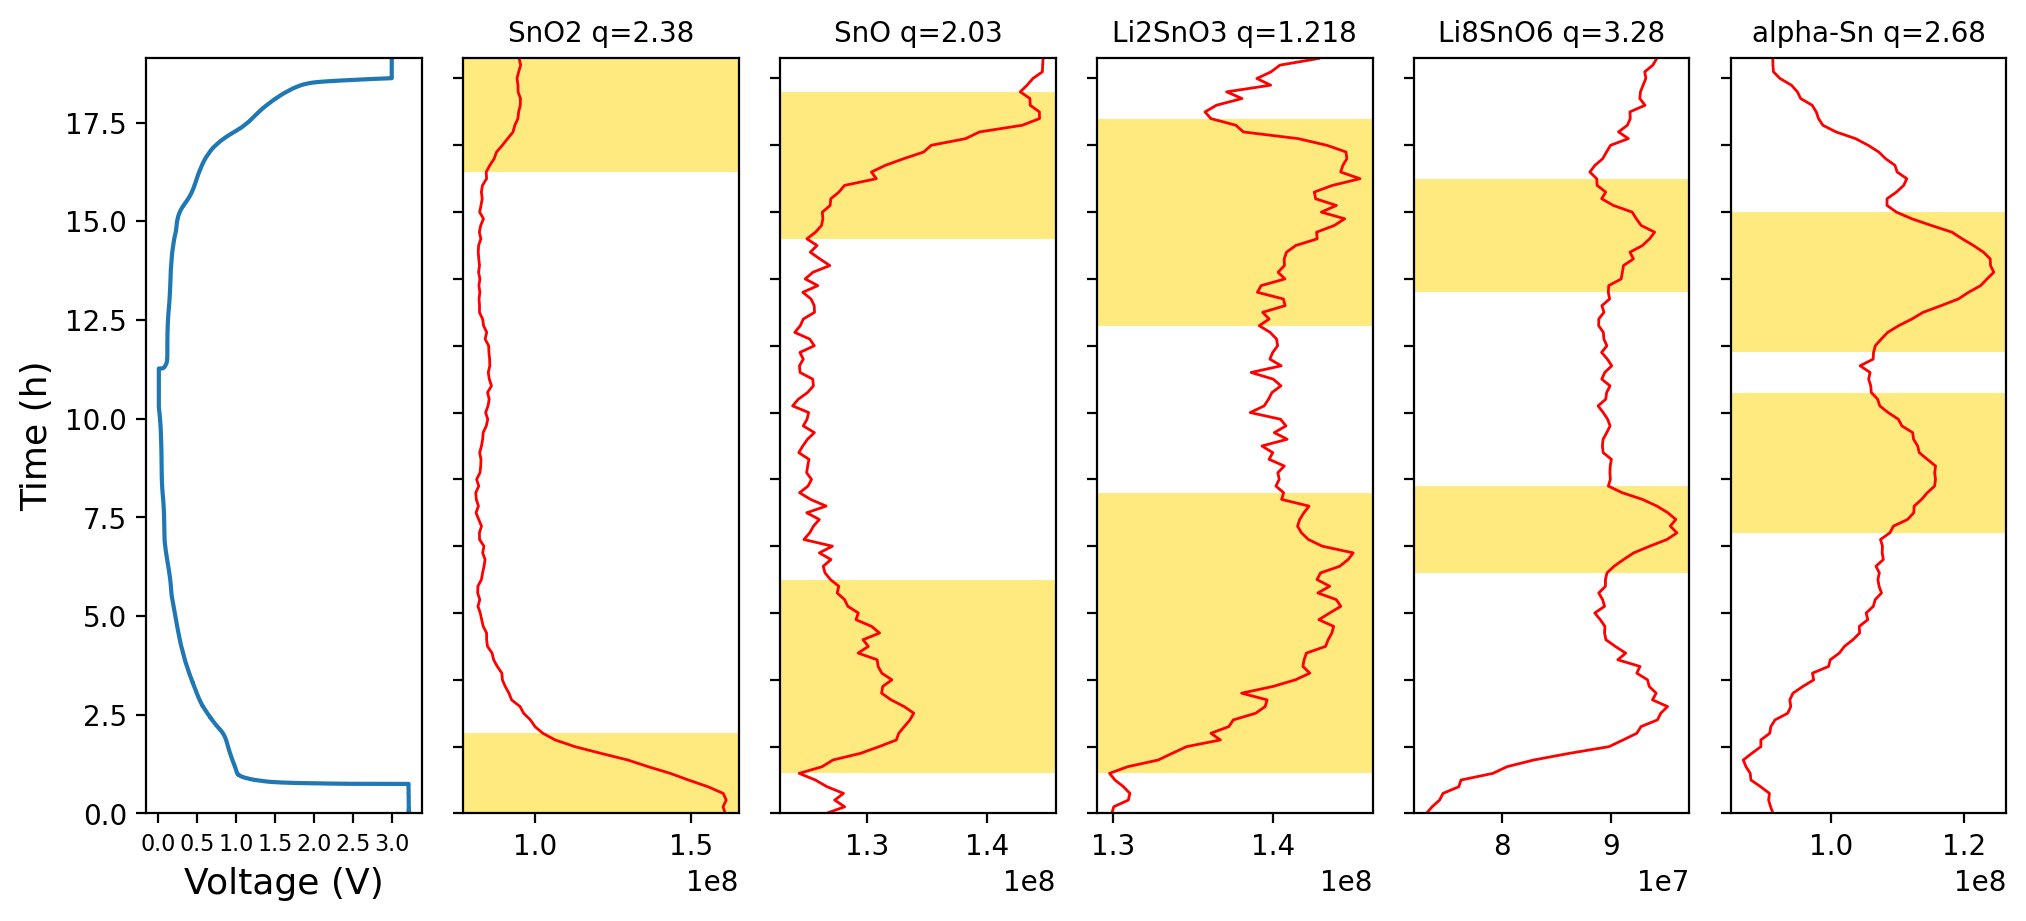

In [71]:
fig = plt.figure(figsize=(12, 5), dpi=200)
grid = plt.GridSpec(1, 6, hspace=0.25, wspace=0.15)

ECP = fig.add_subplot(grid[0,0])
P1 = fig.add_subplot(grid[0,1], yticklabels=[])
P2 = fig.add_subplot(grid[0,2],  sharey = P1)
P3 = fig.add_subplot(grid[0,3],  sharey = P1)
P4 = fig.add_subplot(grid[0,4],  sharey = P1)
P5 = fig.add_subplot(grid[0,5],  sharey = P1)
#yticklabels=[],

ECP.plot(EC['E'],EC['Time'])
ECP.set_ylabel('Time (h)',fontdict={'fontsize':13})
ECP.set_xlabel('Voltage (V)',fontdict={'fontsize':13})
ECP.set_ylim(0, EC['Time'].max())
ECP.set_xticks(np.arange(0, 3.5 , step = 0.5))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=8.0)

q_phase = '2.38,2.03,1.218,3.28,2.68'
q_phase = q_phase.split(',')
ls = [P1,P2,P3,P4,P5]
phase = 'SnO2,SnO,Li2SnO3,Li8SnO6,alpha-Sn'
phase = phase.split(',')

i = 0
for w in q_phase:
    w = float(w)
    for row in range(len(BG['q'])):
        if abs(BG.loc[row,'q']-w)<0.002:
            ls[i].plot(finaldfs.loc[row],finaldfs.columns, lw=1, color='r')
            ls[i].set_title(phase[i]+' q='+q_phase[i], fontdict={'fontsize':10})
        else:
            continue
    i = i+1

        
P1.set_yticks(np.arange(0,scan,10))
P1.set_ylim(0, scan-1)
P1.set_autoscalex_on

P1.axhspan(0, 12, color='gold', alpha=0.5, lw=0)
P1.axhspan(96, 113, color='gold', alpha=0.5, lw=0)

P2.axhspan(6, 35, color='gold', alpha=0.5, lw=0)
P2.axhspan(86, 108, color='gold', alpha=0.5, lw=0)

P3.axhspan(6, 48, color='gold', alpha=0.5, lw=0)
P3.axhspan(73, 104, color='gold', alpha=0.5, lw=0)

P4.axhspan(36, 49, color='gold', alpha=0.5, lw=0)
P4.axhspan(78, 95, color='gold', alpha=0.5, lw=0)

P5.axhspan(42, 63, color='gold', alpha=0.5, lw=0)
P5.axhspan(69, 90, color='gold', alpha=0.5, lw=0)

#Vcut.set_xlim(Imin, Imax)
#P1.legend(q, frameon=False, fontsize=7, bbox_to_anchor=(0.5, 1.3), loc='upper center', borderaxespad=0)

P1.tick_params(axis='y',
                which='both',      # both major and minor ticks are affected                         
                left=True,
                right=False)    # labels along the bottom edge are off"""

plt.savefig('BT2_02C Sn phases.png', bbox_inches='tight')

In [84]:
ls = [0,12,96,111,  6,35,86,108,  6,48,73,104, 36,49,78,95 ,42,63,69,90]
Els = [3,0.842, 1.023,0.160, 0.063,0.151 ]

Sn_phase = pd.DataFrame(columns=['Scan','Potential'])

for i in range(len(ls)):
    for row in range(0,len(EC['Time'])):
        if abs(EC.loc[row,'Time']*6-ls[i])<0.002:
            print(ls[i], EC.loc[row,'Time'], EC.loc[row,'E'])
            Sn_phase.loc[i, 'Scan'] = ls[i]
            Sn_phase.loc[i, 'Potential'] = EC.loc[row,'E']
            #ECP.plot([EC.loc[row,'E']],[EC.loc[row,'Time']], 'ro', markersize=2)
        else:
            continue
            
Sn_phase.to_csv('Sn_phases.csv', index=False)

0 0.0 3.2251246
12 2.0001995719269163 0.84217507
96 16.000006832122843 0.48294276
111 18.500006766316897 1.9490297
6 1.0001995858439436 1.0227321
35 5.833532858849342 0.16038087
86 14.333340162351766 0.18905278
108 18.00000683584813 1.4332126
6 1.0001995858439436 1.0227321
48 8.000199499283756 0.063118182
73 12.166673491649368 0.12073959
104 17.333340167939703 1.0364802
36 6.000199523498141 0.15069282
49 8.166866163932555 0.05583781
78 13.000006826534905 0.14607757
95 15.833340165145733 0.45294228
42 7.00019951139095 0.082360521
63 10.500067099656185 0.0095377136
69 11.500006823740938 0.11663124
90 15.000006830260196 0.24360777


## 02C cycle

In [18]:
### Import WAXS data

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

### The frame number
x=25

path = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/WAXS/02_02C/'
file_name = '02_02C_0001_'
file_BG = '02_02C_0001_0002_0000.dat'
frame = '_00%02d.dat' %x

#BG = pd.read_csv(path + file_BG, delimiter='    ', skiprows=23, usecols=[0], names= ['q'], engine='python')

dfs=[]

#import data into one data frame
for i in range(300):
    name = file_name+ '0%03d'%i + frame
    if name in os.listdir(path):
        dfs.append(pd.read_csv(path + name, delimiter='    ', skiprows=23, usecols=[1] , names= ['%d'%i], engine='python'))
    else:
        continue
finaldfs2 = pd.concat(dfs, axis=1)



In [19]:
### Import electrochemical data
file = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/echm/20220712_G_SnO_beamtime_02_GCPL_C01.txt'
EC2 = pd.read_csv(file,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11],
                 names= ['Time', 'E'],
                 engine='python')

EC2['Time'] = EC2['Time']/3600-EC['Time'].max()

In [155]:
# input the vertical cut
q = '0,1.7,1.79,1.82,1.87'
#'2.536,3.008,3.46'
#'1.693,1.782,1.814,1.854,1.867'
#'5.31,5.365,5.40,5.425' #another set of graphite, but see more
#'2.007,2.338,2.535,2.699'
#'1.693,1.782,1.814,1.854,1.867'
#'1.694,1.782,1.804,1.81,1.816,1.85,1.855,1.860,1.867'
#input('Enter one or multiple q that you want to make cuts. ex: 1.86,3.23.   ')
q=q.split(',')

In [21]:
# input the horizontal cut
s2 = '2,22,42,62,82,102'
#'16,38,48,70,104,116,124,140'
#input('Enter one or multiple "sequence of the scan" that you want to make cuts. Even number only. ex: 2,4,8.   ')
s2 = s2.split(',')

592
821
60091750.0 273123810.0


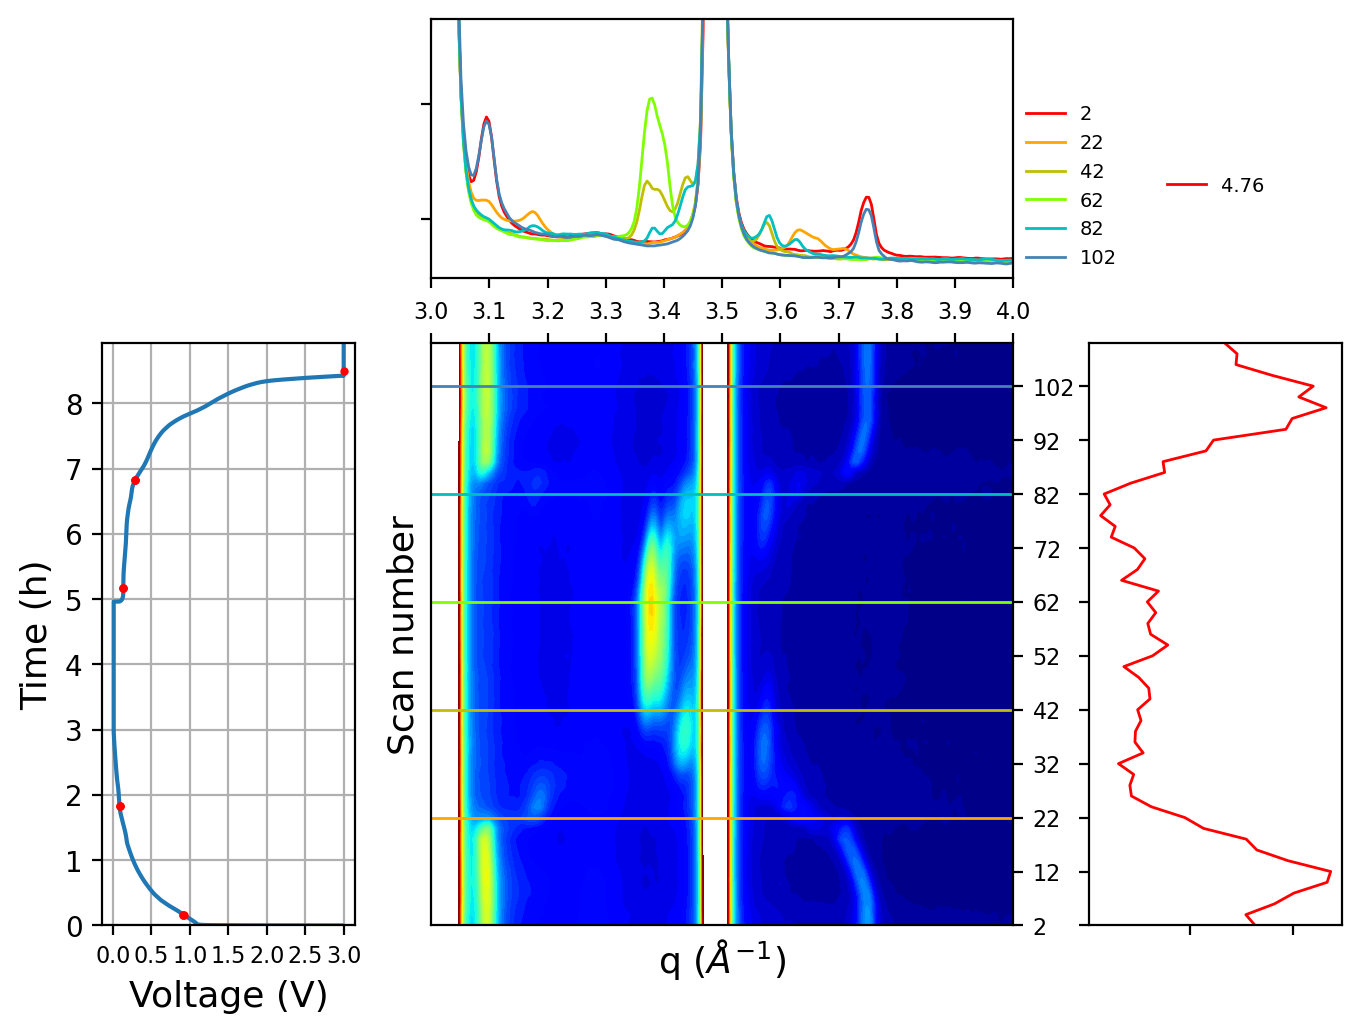

In [242]:
### create arrays for x and y columns
x_col = np.array(BG['q'])
#y_col = np.array(list(finaldfs.columns))
y_col = np.array(list(range(len(finaldfs2.columns))))

### make a grid which x axis is "2 theta", y axis is "scan #"
X, Y = np.meshgrid(y_col, x_col)

from matplotlib import cm

### built the grid for multiple figures
fig = plt.figure(figsize=(8, 6), dpi=200)
grid = plt.GridSpec(3, 4, hspace=0.25, wspace=0.3)
contour = fig.add_subplot(grid[1:, 1:-1])
Vcut = fig.add_subplot(grid[1:, -1], xticklabels=[], sharey=contour)
Hcut = fig.add_subplot(grid[0, 1:-1], yticklabels=[], sharex=contour)
ECP = fig.add_subplot(grid[1:, 0])

### Optimize the levels for contour

for row in range(0,len(BG['q'])):  # Find the row number
    if abs(BG.loc[row,'q']-min)<0.002: # If the row value is close enough
        LB = row #Lower boundary
        print(LB)
    else:
        continue
for row in range(0,len(BG['q'])):  # Find the row number
    if abs(BG.loc[row,'q']-max)<0.002: # If the row value is close enough
        UB = row #Upper boundary
        print(UB)
    else:
        continue

Imax = finaldfs2[int(LB):int(UB)].max().max()*0.045 # the maximum intensity in this range
Imin = finaldfs2[int(LB):int(UB)].min().min() # the minimum intensity in this range

print(Imin,Imax)

n=50
levels=np.linspace(Imin, Imax, n)
#levels=np.linspace(7e7, 6e8, n)


### Plot the electrochemical data
ECP.plot(EC2['E'],EC2['Time'])
ECP.set_ylabel('Time (h)',fontdict={'fontsize':13})
ECP.set_xlabel('Voltage (V)',fontdict={'fontsize':13})
ECP.set_ylim(0, EC2['Time'].max())
ECP.set_xticks(np.arange(0, 3.5 , step = 0.5))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=8.0)
ECP.grid()


colorlist=['red', 'orange', 'y',  'Chartreuse', 'c', '#4682B4', 'b', 'm']

contour.set_prop_cycle(color=colorlist)
Hcut.set_prop_cycle(color=colorlist)

### Plot H cut profiles to the top figure and add the H cutting lines to the contour figure

#Hcut.set_title('WAXS time evolution Z=%02d' %x, fontdict={'fontsize':15})

for w in s2:
    Hcut.plot(BG['q'], finaldfs2[w], lw=1)
   
 # plot the dots in ECP
    for row in range(0,len(EC2['Time'])):
        if abs(EC2.loc[row,'Time']-int(w)/12)<0.001:
            ECP.plot([EC2.loc[row,'E']],[EC2.loc[row,'Time']], 'ro', markersize=2)
        else:
            continue
            
for i in range(len(s2)):
    contour.plot([min, max], [int(s2[i])/2-1, int(s2[i])/2-1], lw=1) # plot the cut line
    
#Hcut.legend(s, frameon=False, fontsize=7)
Hcut.legend(s2, frameon=False, fontsize=7, bbox_to_anchor=(1.1, 0.7), loc='upper center', borderaxespad=0)
    
Hcut.tick_params(axis='x', which='both', bottom=True, labelbottom=False)
Hcut.tick_params(axis='y', which='both', left=True, labelleft=True)
#Hcut.set_autoscaley_on
Hcut.set_ylim(Imin*0.8, Imax)


### To plot Vcut, must know which row to plot. The following loop is used to select the correct row.
### Plot V cut profiles to the right figure and add the V cutting lines to the contour figure

contour.set_prop_cycle(color=colorlist)
Vcut.set_prop_cycle(color=colorlist)

scan = len(finaldfs2.columns)

for w in q:
    w = float(w)
    for row in range(0,len(BG['q'])):
        if abs(BG.loc[row,'q']-w)<0.002:
            Vcut.plot(finaldfs2.loc[row],finaldfs2.columns, lw=1)
            contour.plot([w, w], [0, scan],lw=1)  # plot the cut line
        else:
            continue
        
Vcut.set_yticks(np.arange(0,scan,5))
Vcut.set_ylim(0, scan-1)
Vcut.set_autoscalex_on
#Vcut.set_xlim(Imin, Imax)
Vcut.legend(q, frameon=False, fontsize=7, bbox_to_anchor=(0.5, 1.3), loc='upper center', borderaxespad=0)

Vcut.tick_params(axis='y',
                which='both',      # both major and minor ticks are affected                         
                left=True,
                right=False,
                labelleft=False)    # labels along the bottom edge are off



### Plot contour
contour.set_xticks(np.arange(min, max2 , step = step))
contour.set_xlim(min, max)
contour.contourf(Y, X, finaldfs2, levels, cmap=cm.jet )
contour.set_xlabel(r'q ($\AA^{-1}$)',fontdict={'fontsize':13})
contour.set_ylabel('Scan number',fontdict={'fontsize':13})
contour.tick_params(axis='y',
                    which='both',      # both major and minor ticks are affected                         
                    left=False,
                    right=True,
                    labelright=True,
                    labelleft=False,
                    labelsize=8.0)    # labels along the bottom edge are off

contour.tick_params(axis='x',
                    which='both',
                    bottom=False,    # ticks along the bottom edge are off
                    top=True,    # ticks along the top edge are off
                    labelbottom=False,
                    labeltop=True,
                    labelsize=8.0)

#plt.savefig('BT2_02C Z=%d '%x+'q=%.2f'%min+'~%.2f.png'%max, bbox_inches='tight')

In [129]:
finaldfs2

,2,4,6,8,10,12,14,16,18,20,...,92,94,96,98,100,102,104,106,108,110
0,41221280.0,40691610.0,46551890.0,46170560.0,50037210.0,42137160.0,39746620.0,34734240.0,30932340.0,32993920.0,...,34827430.0,32073850.0,35434010.0,53890770.0,51812870.0,46468870.0,42430560.0,37822600.0,42400470.0,41298840.0
1,40523740.0,43688160.0,51760450.0,45953040.0,45958600.0,45094650.0,39081690.0,34226430.0,32405650.0,30978840.0,...,32602170.0,32084870.0,35898730.0,49728900.0,50366290.0,44437260.0,44327120.0,41632970.0,42977920.0,42673950.0
2,41960240.0,43440360.0,50682120.0,46644540.0,44335700.0,44040150.0,39862540.0,33053580.0,31790840.0,31589270.0,...,32712550.0,32528770.0,37643980.0,48162920.0,48676780.0,44599240.0,41953520.0,42320220.0,41062960.0,41662110.0
3,40934720.0,42200120.0,47834000.0,46892420.0,44145290.0,42499450.0,38299130.0,32955710.0,32824280.0,32233240.0,...,30907780.0,33346730.0,38884660.0,46052960.0,46518820.0,44638850.0,40830720.0,40861390.0,38473030.0,39573560.0
4,39881430.0,41309360.0,46350420.0,46535010.0,44902490.0,41887380.0,37233630.0,33573400.0,33938120.0,33543940.0,...,29525520.0,34090780.0,38489140.0,45321860.0,46043930.0,44476240.0,40194070.0,40485980.0,38919750.0,39213210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,23867740.0,23705260.0,29915310.0,27478410.0,26137210.0,31409130.0,26659340.0,27341240.0,26091630.0,21628820.0,...,26069930.0,23788150.0,27079970.0,30466390.0,22318180.0,23053940.0,23554170.0,27759260.0,29600250.0,25944780.0
2996,23989670.0,26338260.0,27001980.0,29278630.0,24329950.0,28826300.0,26776320.0,28249500.0,24612150.0,24382360.0,...,28721800.0,26604930.0,28603030.0,31813140.0,21050160.0,22830300.0,19942260.0,23725030.0,29268990.0,23195150.0
2997,24770140.0,32057630.0,25364650.0,33611340.0,25638080.0,26241180.0,26038760.0,29315070.0,25839680.0,32391330.0,...,30400630.0,28289840.0,26624860.0,32198870.0,21301960.0,24132590.0,21429220.0,25853090.0,31813110.0,25256090.0
2998,22136070.0,30084990.0,32428410.0,32541860.0,23517670.0,22150350.0,21536230.0,23913070.0,24783090.0,34983700.0,...,28999460.0,27501790.0,23827810.0,28713780.0,21379720.0,22540230.0,28481590.0,29886210.0,31081200.0,24367470.0


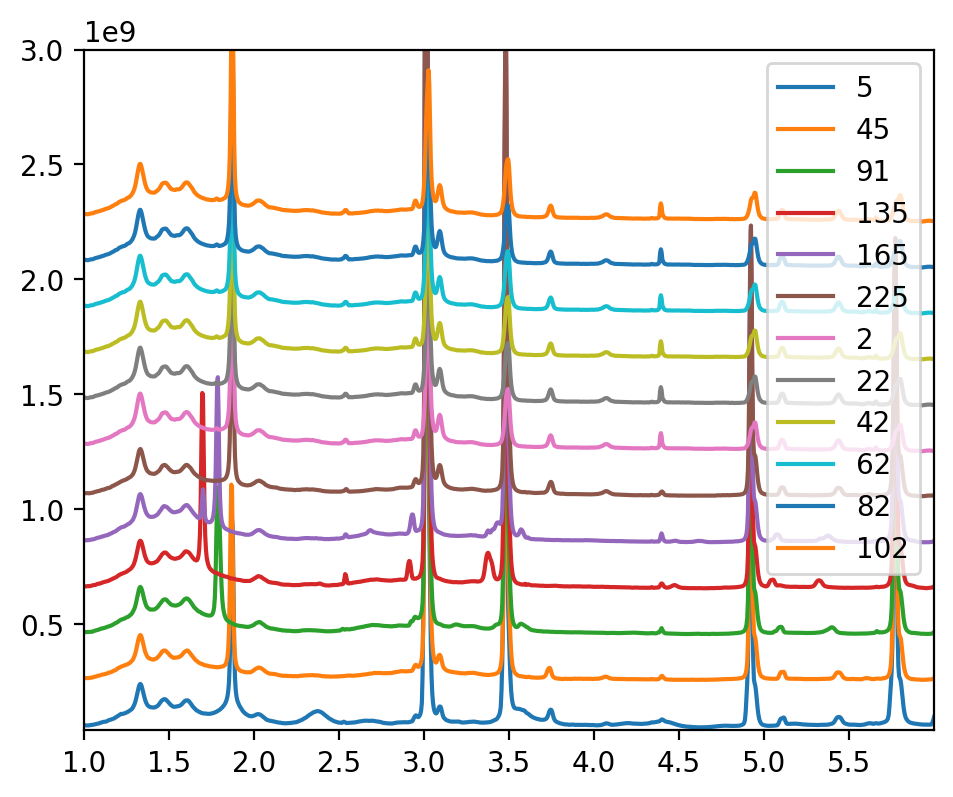

In [93]:
fig_2 = plt.figure(figsize=(5,4),dpi=200)
axes_2 = fig_2.add_axes([0.1, 0.1, 0.85, 0.85])
plt.xticks(np.arange(1, 6, step = 0.5))
#plt.xlim(7, 11)
plt.xlim(1,6)
#plt.autoscale()
plt.ylim(4e7, 3e9)
scan = [5,45,91,135,165,225]
scan2 = [2,22,42,62,82,102]

for i in range(len(scan)):
    plt.plot(BG['q'],finaldfs[str(scan[i])]+2e8*i)


for j in range(len(scan2)):
    plt.plot(BG['q'],finaldfs2[str(scan2[i])]+2e8*(i+1)+2e8*j)
plt.legend(scan+scan2)
#plt.plot(BG['2theta'],finaldfs['160'])